<a href="https://colab.research.google.com/github/Jay0774/Android/blob/master/GRADIENT_DESCENT_AND_ERROR_FINDING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1 : RELATED TO DATA GATHERING AND DATA VISUALIZATION


In [0]:
import numpy as np # muli dimensional array 
import pandas as  pd # load data in data frame object
import matplotlib as mlp
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation # animations 

# all required libraries from sklearn
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML # for display

In [107]:
# first we need to get data 

boston = load_boston()
boston

# after getting data we need to do preprocessing

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [108]:
# step 1 data preprocessing of boston data
# to get features from data set we use pandas

features = pd.DataFrame(boston.data,columns=boston.feature_names)

# to get any column
features['AGE']


0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [0]:
# to get the target column of boston dataset
target = pd.DataFrame(boston.target,columns=['target'])


In [110]:
# to perform simple tasks on target dataset
max(target['target'])

50.0

In [0]:
# to concatenate the complete set use concat with axis=1 for columns
df = pd.concat([features,target],axis=1)


In [112]:
# visualization od dataset
# describing the dataset
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# Hence data has been gathered.

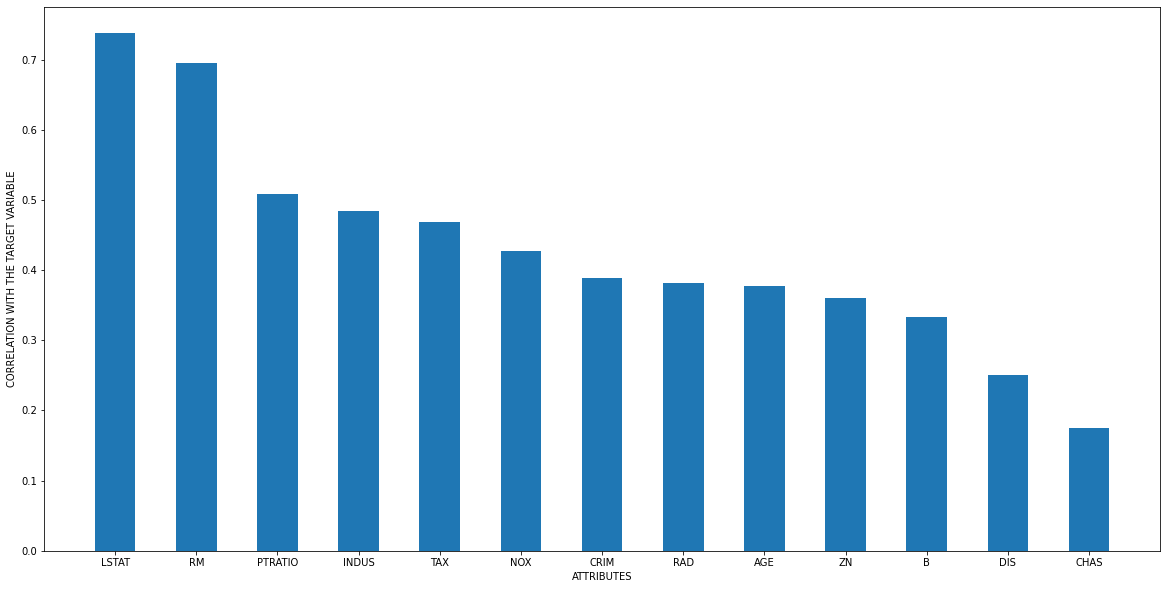

In [113]:
# claculating correlation between every column in data 

corr = df.corr('pearson').round(decimals=5)

# to get corelation between different objects
# 1. get all the features as a list
feature = list(features)

# 2.use correaltio to get correlations
corrs = [abs(corr[attr]['target']) for attr in feature]

# 3. use zip function to aggregate elements fron two iterators corrs and feature
l = list(zip(corrs,feature))

# 4. use sort function to sort the zip in decending order
l.sort(key= lambda x : x[0], reverse=True)

# 5. unzip the list l in two lists using zip function 
corr, labels = list(zip(*l))

# now finally plot a graph to show the correlations
index = np.arange(len(labels))
plt.figure(figsize=(20,10))
plt.bar(index,corr,width=0.5)
plt.xlabel('ATTRIBUTES')
plt.ylabel('CORRELATION WITH THE TARGET VARIABLE')
plt.xticks(index,labels)
plt.show()




# **We now know that lstat has the highest correlation with target variable**



# **NORMALIZATION OF DATA**(using minmaxscaler)

In [0]:
# to get variables for normalization in regression model
X = df['LSTAT'].values
Y = df['target'].values



In [0]:
# using minmaxscaler

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[ : -1]

y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[ : -1]


# START OF LINAER REGRESSION

# STEP 2 : FINDIND ERRORS

MEAN_SQUARED_ERROR=1/n(sum(np.power(target-predicted,2)))



In [0]:
# defining the error
def error(m,x,c,t):
  N = x.size
  e = sum(((m*x+c)-t)**2)
  return e*1/(2*N)


# STEP 3 : SPLITTING THE DATA SET

In [0]:
# splitting the data so model can be applied on it in xtrain xtest ytrain ytest and 0.2 indicates 20%

xtrain , xtest , ytrain , ytest = train_test_split(X,Y,test_size=0.2)


# STEP4 : DEFINING THE UPDATE FUNCTION AND GRADIENT DECENT FUNCTION


In [0]:
def update(m,x,c,t,learning_rate):
  grad_m = sum(2*((m*x+c)-t)*x)
  grad_c = sum(2*((m*x+c)-t))
  m = m-grad_m*learning_rate
  c = c-grad_c*learning_rate
  return m,c

In [0]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
  m = init_m
  c = init_c
  error_values = list()
  mc_values = list()
  for i in range(iterations):
    e = error(m,x,c,t)
    if e < error_threshold:
      print("ERROR LESS THAN THRESHO;D STOPPING GRADIENT DESCENT")
      break
    error_values.append(e)
    m , c = update(m,x,c,t,learning_rate)
    mc_values.append((m,c))
  return m , c , error_values , mc_values




In [120]:
# magic function
%%time 

init_m = 0.09
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

m , c , error_values , mc_values = gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)
 


CPU times: user 221 ms, sys: 0 ns, total: 221 ms
Wall time: 222 ms


# MODEL VISUALIZATION

In [0]:
# as visualization takes more cpu processing so we use less no of iterations than used earlier

mc_values_visual = mc_values[0:250:5]




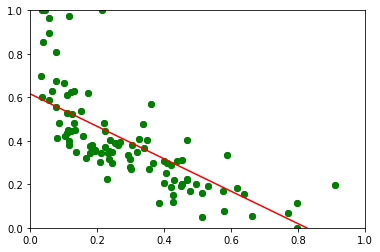

In [122]:
fig , ax = plt.subplots()
ln, = plt.plot([],[],'ro-',animated=True)


# defininf init function

def init():
  plt.scatter(xtest,ytest,color='g')
  ax.set_xlim(0,1.0)
  ax.set_ylim(0,1.0)
  return ln,


# defining the update frame function

def update_frame(frame):
  m , c = mc_values_visual[frame]
  x1 , y1 = -0.5 , m*-0.5 + c
  x2 , y2 = 1.5 , m*1.5 + c
  ln.set_data([x1,x2],[y1,y2])
  return ln,

anim = FuncAnimation(fig , update_frame , frames=range(len(mc_values_visual)) , init_func=init , blit=True)

HTML(anim.to_html5_video())

# VISUALIZATION OF ERRORS

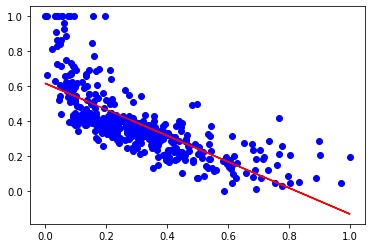

In [123]:
plt.scatter(xtrain,ytrain,color='b')
plt.plot(xtrain ,(m*xtrain+c),color='r')

Text(0.5, 0, 'ITERATIONS')

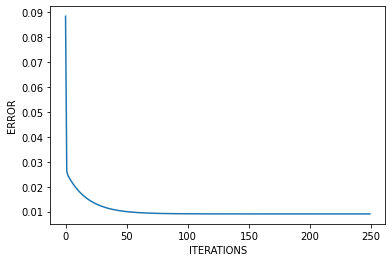

In [124]:
# plotting error values

plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('ERROR')
plt.xlabel('ITERATIONS')
